In [34]:
%matplotlib inline

import json
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

In [35]:
with open('data.json') as data_file:    
    data = json.load(data_file)

In [93]:
posting_times = []
for listing in data:
    dt = datetime.strptime(listing['datetime'], '%Y-%m-%d %H:%M')
    if len(posting_times) == 0:
        # by looking at the data, i saw that it goes more than 2 days back. would need to verify this is true before doing this.
        max_time = dt
        min_time = dt - timedelta(days=2)
    elif dt < min_time:
        break

    time_without_day = dt.replace(year=2017, month=1, day=1)
    posting_times.append(time_without_day)

min_time_for_range = min_time.replace(year=2017, month=1, day=1)
max_time_for_range = max_time.replace(year=2017, month=1, day=1)
print(len(posting_times))

2217


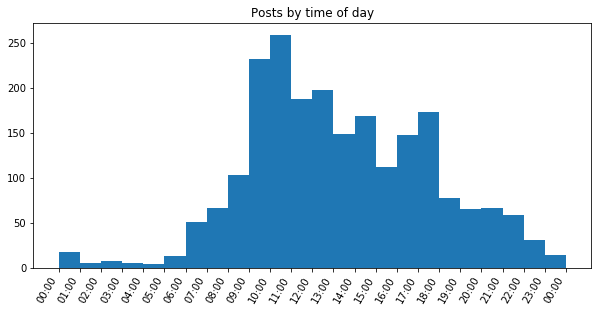

In [109]:
plt.close('all')
plt.ion()
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(posting_times, bins=24, range=(min_time_for_range,max_time_for_range))

plt.title('Posts by time of day')
# label every bin, not just random ones
ax.set_xticks(bins)

# rotate and align the tick labels so they look better
fig.autofmt_xdate(rotation=60)
fig.set_size_inches(10, 5)

# set date formatting to just show time
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
